<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

df = pd.read_excel(path)
df.head()

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock,Region,Income Level,Discount Availed,Customer Tenure (Years),Campaign,Return Rate (%),Website Visit Frequency,Average Cart Value
0,1,23,F,150,1,Satisfied with the service,Clothing,4,East,Medium,46,4,Winter Sale,2.981829,3,378.00
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86,West,Low,61,12,Summer Sale,1.833412,6,315.52
2,3,45,F,800,0,Regular customer,Books,24,North,Medium,50,12,Black Friday,6.547401,0,250.69
3,4,52,M,200,0,Occasional buyer,Beauty,10,East,Medium,54,7,Winter Sale,3.923717,1,222.58
4,5,29,F,300,1,High spender,Books,47,East,Medium,63,12,Winter Sale,2.306644,4,298.68


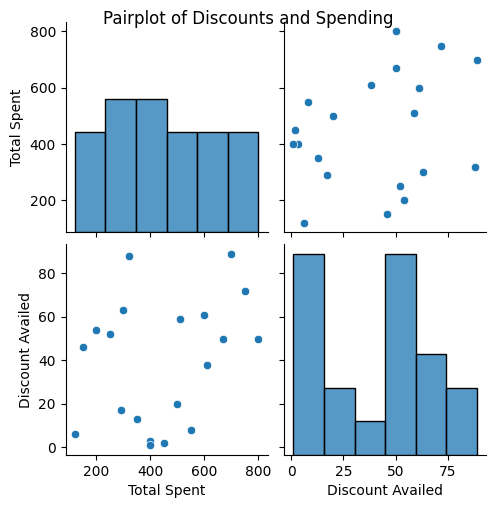

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[['Total Spent', 'Discount Availed']])
plt.suptitle('Pairplot of Discounts and Spending', y=1)
plt.show()

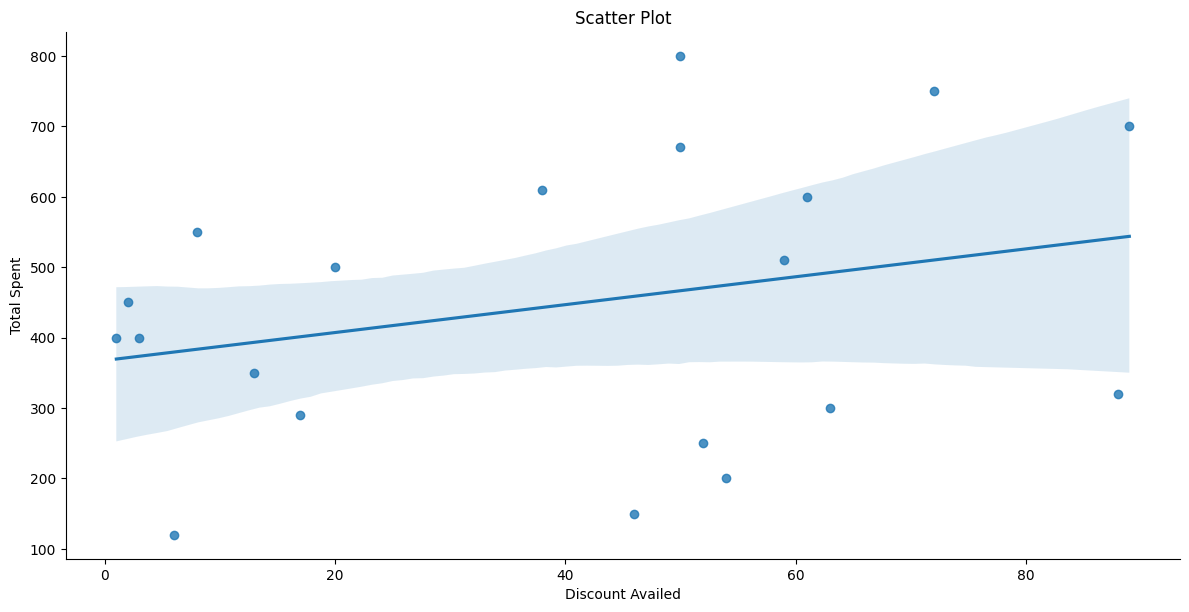

In [3]:
sns.lmplot(x='Discount Availed', y='Total Spent', data=df, aspect=2, height=6)
plt.title('Scatter Plot')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()

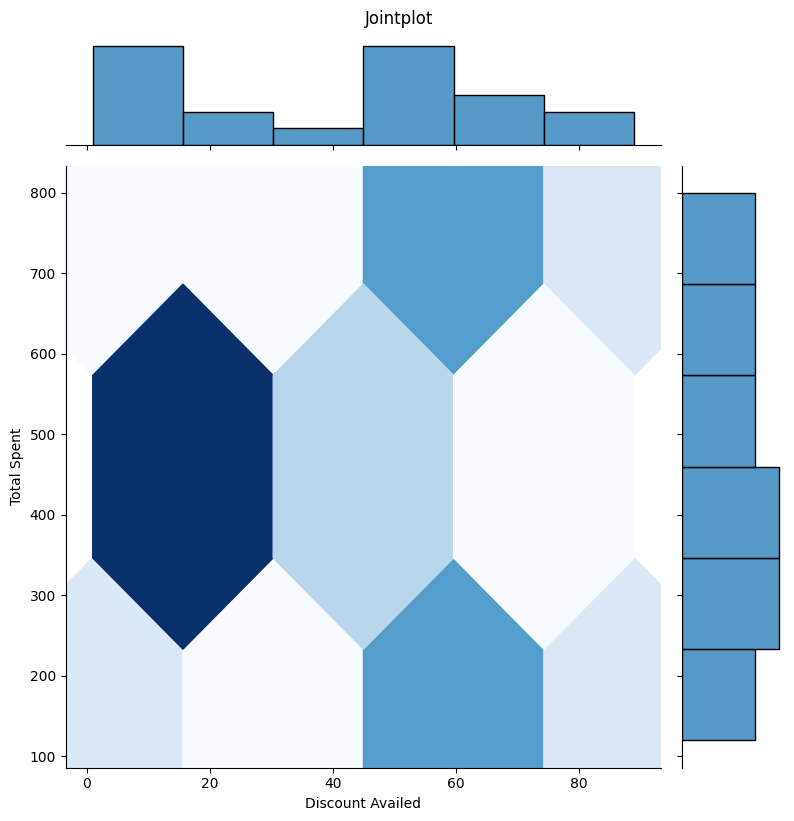

In [7]:
sns.jointplot(x='Discount Availed', y='Total Spent', data=df, kind='hex', height=8, cmap='Blues')
plt.suptitle('Jointplot', y=1.02)
plt.show()

Darker hexagons indicate higher density, meaning more data points are concentrated in that area.


In [8]:
!pip install joypy

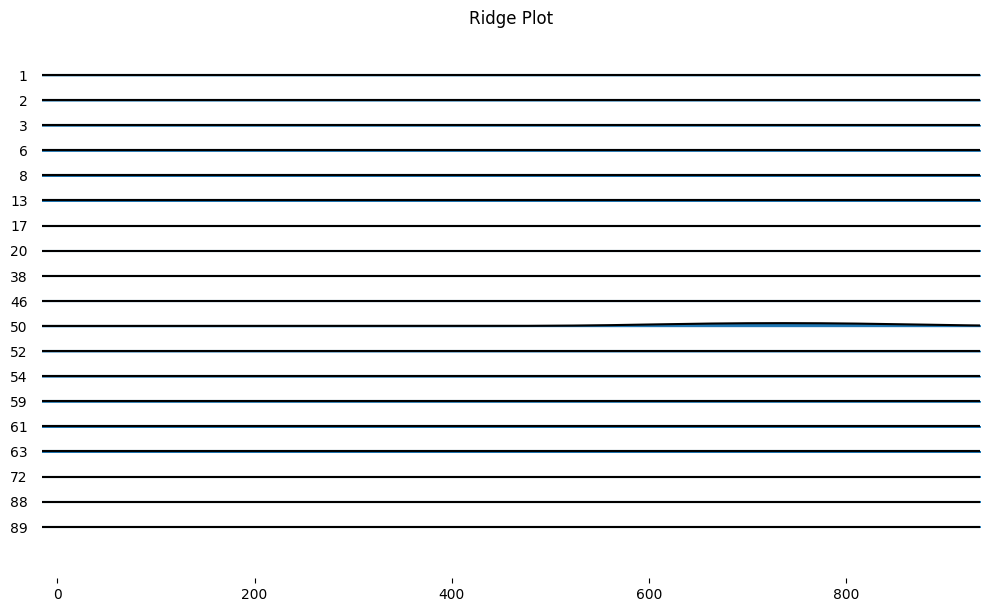

In [9]:
import joypy

joypy.joyplot(data=df[['Discount Availed', 'Total Spent']],
              by='Discount Availed', figsize=(10, 6))
plt.title('Ridge Plot')
plt.show()

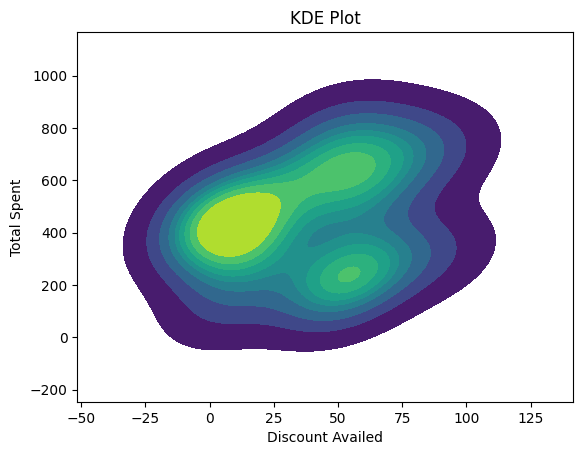

In [12]:
sns.kdeplot(x=df['Discount Availed'], y=df['Total Spent'], cmap='viridis', fill=True)
plt.title('KDE Plot')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()

Customers who availed discounts between 10 to 30 seem to have higher spending Total Spent around '400-600'

sns.swarmplot(x='Discount Availed', y='Total Spent', data=df, size=6, palette='Set2')
plt.title('Swarm Plot: Discounts vs Spending')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()

sns.boxplot(x='Discount Availed', y='Total Spent', data=df, color='lightblue')
sns.stripplot(x='Discount Availed', y='Total Spent', data=df, color='red', alpha=0.5, jitter=True)
plt.title('Box Plot with Strip Overlay')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()


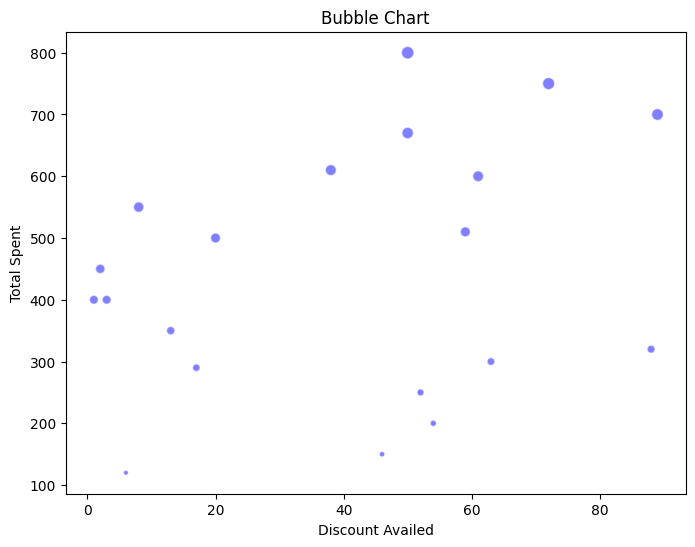

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Discount Availed'], df['Total Spent'],
            s=df['Total Spent'] * 0.1, alpha=0.5, c='blue', edgecolors='w')
plt.title('Bubble Chart')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()

<ipython-input-15-1fbfa5f43276>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending = df.groupby(discount_bins)['Total Spent'].mean()


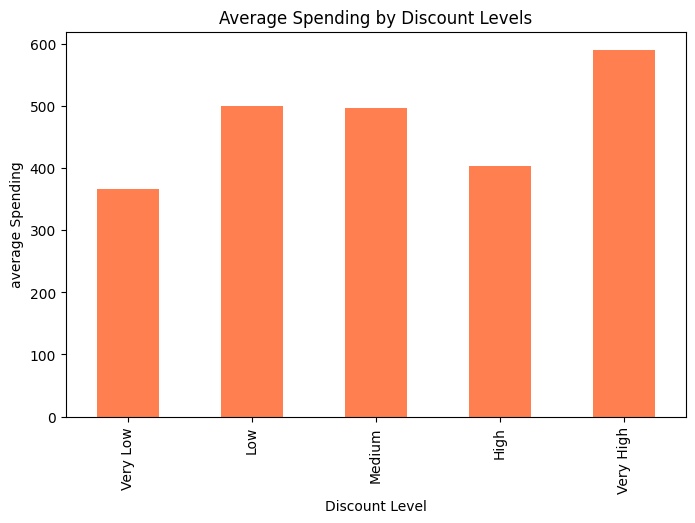

In [15]:
discount_bins = pd.cut(df['Discount Availed'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
avg_spending = df.groupby(discount_bins)['Total Spent'].mean()

avg_spending.plot(kind='bar', color='coral', figsize=(8, 5), title='Average Spending by Discount Levels')
plt.xlabel('Discount Level')
plt.ylabel('average Spending')
plt.show()